In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.svm import SVR

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y= dataset.iloc[:,-1].values
y = y.reshape(len(y),1)

In [3]:
# feature scaling
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [4]:
#  train svr modal with whole dataset
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

d:\python\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [5]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

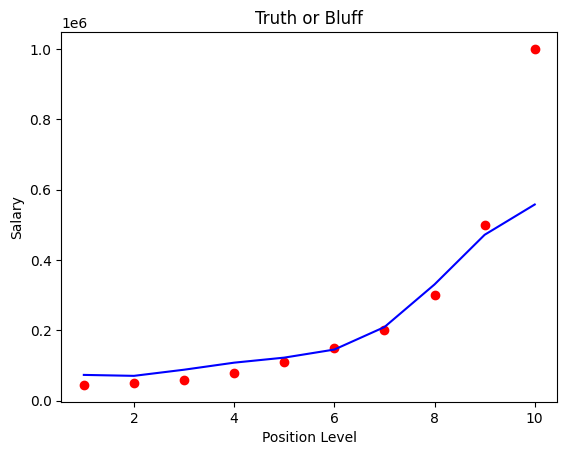

In [6]:
# visualize SVR Results

plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)),color='blue')
plt.title('Truth or Bluff')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()